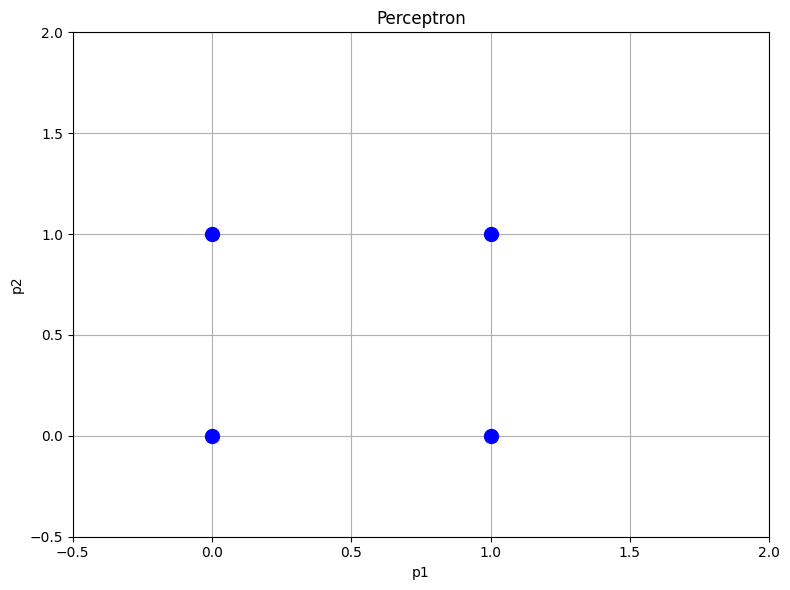

Fw1 = 0.8260, w2 = -0.2624
bias: b = 0.9547
Entrada: [0, 0] -> Salida: 1 (Valor esperado: 0)
Entrada: [0, 1] -> Salida: 1 (Valor esperado: 1)
Entrada: [1, 0] -> Salida: 1 (Valor esperado: 1)
Entrada: [1, 1] -> Salida: 1 (Valor esperado: 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 100 # Epocas
Q = 4 # Dimensiones de las entradas
p0 = np.array([1, 1, 1, 1]) # Patron de bias
p1 = np.array([0, 0, 1, 1]) # Patron uno de entrada
p2 = np.array([0, 1, 0, 1]) # Patron dos de entrada

y = np.array([0, 1, 1, 1]) # Salidas deseadas compuerta OR

alpha = 0.1

w = 2 * np.random.rand(2) - 1
b = 2 * np.random.rand() - 1

pr = np.arange(-0.5, 2, 0.01)

def hardlim(n):
    return np.where(n >= 0, 1, 0)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 2)
ax.grid(True)
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_title('Perceptron')

ax.plot(p1[0], p2[0], 'bo', markersize=10)
ax.plot(p1[1], p2[1], 'bo', markersize=10)
ax.plot(p1[2], p2[2], 'bo', markersize=10)
ax.plot(p1[3], p2[3], 'bo', markersize=10)

line, = ax.plot([], [], 'r-', linewidth=2)

def train():
    global w, b
    
    for epoch in range(N):
        a = np.zeros(Q)
        e = np.zeros(Q)
        
        for q in range(Q):
            net_input = w[0] * p1[q] + w[1] * p2[q] + b * p0[q]
            a[q] = hardlim(net_input)
            
            e[q] = y[q] - a[q]
            
            w[0] = w[0] + alpha * e[q] * p1[q]
            w[1] = w[1] + alpha * e[q] * p2[q]
            b = b + e[q]
        
        if epoch % 10 == 0:
            yield epoch

def update(frame):
    if w[1] != 0:
        boundary = -b / w[1] - w[0] / w[1] * pr
        line.set_data(pr, boundary)
    return line,

anim = FuncAnimation(fig, update, frames=train, interval=40, 
                     blit=True, repeat=False, cache_frame_data=False)

plt.tight_layout()
plt.show()

print(f"w1 = {w[0]:.4f}, w2 = {w[1]:.4f}")
print(f"bias: b = {b:.4f}")


for q in range(Q):
    net_input = w[0] * p1[q] + w[1] * p2[q] + b * p0[q]
    output = hardlim(net_input)
    print(f"Entrada: [{p1[q]}, {p2[q]}] -> Salida: {output} (Valor esperado: {y[q]})")